In [119]:
from ast import increment_lineno
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
import numpy as np

In [120]:
df = pd.read_csv("/content/Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [121]:
df.shape


(13320, 9)

In [122]:
df.groupby('area_type')['area_type'].agg('count')

,area_type
area_type,
Built-up Area,2418
Carpet Area,87
Plot Area,2025
Super built-up Area,8790


In [123]:
df1 = df.drop(['area_type', 'availability', 'society', 'balcony'], axis=1)
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [124]:
df1.isnull().sum()


,0
location,1
size,16
total_sqft,0
bath,73
price,0


In [125]:
df2 = df1.dropna()
df2.isnull().sum()

,0
location,0
size,0
total_sqft,0
bath,0
price,0


In [126]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [127]:
df2['bhk'] = df2['size'].apply(lambda x: int(x.split(" ")[0]))
df2.head()

<ipython-input-127-43239a4671cc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk'] = df2['size'].apply(lambda x: int(x.split(" ")[0]))


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [128]:
df2['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [129]:
df2[df2.bhk >20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [130]:
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [131]:
def is_float(x):
  try:
      float(x)
  except:
    return False
  return True

In [132]:
df2[~df2['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [133]:
def convert_sqft_num(x):
  token = x.split('-')
  if len(token) == 2:
    return((float(token[0])+ float(token[1]))/2)
  try:
    y = float(x)
    return y
  except:
    return None

In [134]:
convert_sqft_num('213')

213.0

In [135]:
convert_sqft_num('213-23')

118.0

In [136]:
convert_sqft_num('213kjdk')

In [137]:
df3 = df2.copy()
df3['total_sqft'] = df3['total_sqft'].apply(convert_sqft_num)
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [138]:
df3.loc[30]

,30
location,Yelahanka
size,4 BHK
total_sqft,2475.0
bath,4.0
price,186.0
bhk,4


so far


*   removed Na
*   cleaned total_sqft
*   removed few cloumns(features)




In [139]:
df4 = df3.copy()
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [140]:
df4['price_per_sqft'] = df4['price']*100000/df4['total_sqft']
df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [141]:
len(df4['location'].unique())

1304

# categorizing locations having count <= 10 into "other"

In [142]:
df4.location = df4['location'].apply(lambda x: x.strip())
location_stats = df4.groupby('location')['location'].count().sort_values(ascending = False)
location_stats

,location
location,
Whitefield,535
Sarjapur Road,392
Electronic City,304
Kanakpura Road,266
Thanisandra,236
...,...
1 Giri Nagar,1
"Kanakapura Road,",1
Kanakapura main Road,1


In [143]:
len(location_stats[location_stats <= 10])

1052

In [144]:
# location_stats[location_stats <= 10].tail(500)

In [145]:
location_stats_less_than_10 = location_stats[location_stats <= 10]

In [146]:
len(df4.location.unique())

1293

In [147]:
df4.location = df.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)

In [148]:
len(df4.location.unique())

283

# Removing outliers

In [149]:
df4[df4.total_sqft/df4.bhk < 300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [150]:
df4.shape

(13246, 7)

In [151]:
df5 = df4[~(df4.total_sqft/df4.bhk < 300)]
df5.shape

(12502, 7)

In [152]:
df5.price_per_sqft.describe()

,price_per_sqft
count,12456.000000
mean,6308.502826
std,4168.127339
min,267.829813
25%,4210.526316
50%,5294.117647
75%,6916.666667
max,176470.588235


In [153]:
df5.groupby('location')['price_per_sqft'].describe()

,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
Anekal,1.0,4558.404558,NaN,4558.404558,4558.404558,4558.404558,4558.404558,4558.404558
Banaswadi,1.0,6641.366224,NaN,6641.366224,6641.366224,6641.366224,6641.366224,6641.366224
Basavangudi,1.0,7462.686567,NaN,7462.686567,7462.686567,7462.686567,7462.686567,7462.686567
Devarabeesana Halli,6.0,7900.452568,1637.393519,5401.234568,6901.298701,8542.857143,8871.326042,9580.838323
Devarachikkanahalli,14.0,4969.906245,2594.870914,3185.840708,3649.081736,4305.148257,4676.936243,13333.333333
Electronic City,2.0,4695.924765,301.462452,4482.758621,4589.341693,4695.924765,4802.507837,4909.090909
Mysore Highway,4.0,4461.458189,1610.779884,2833.333333,3440.476190,4235.221675,5256.203674,6542.056075
Rachenahalli,2.0,5581.818182,1105.657876,4800.000000,5190.909091,5581.818182,5972.727273,6363.636364
Sector 1 HSR Layout,1.0,4600.000000,NaN,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000


In [154]:
def remove_price_per_sqft_outlier(df):
  df_out = pd.DataFrame()

  for key, subdf in df.groupby('location'):

    m = np.mean(subdf.price_per_sqft)
    st = np.std(subdf.price_per_sqft)
    reduced_df = subdf[ (subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft <= (m+st))]
    df_out = pd.concat([df_out,reduced_df], ignore_index=True)

  return df_out

df6 = remove_price_per_sqft_outlier(df5)
df6.shape

(10201, 7)

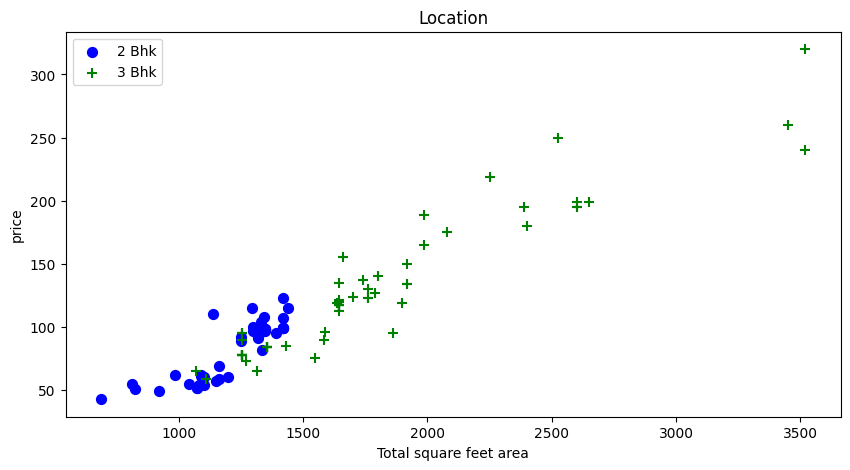

In [155]:
def plot_scatter_chart(df,location):

  bhk_2 = df[(df.location == location) & (df.bhk == 2)]
  bhk_3 = df[(df.location == location) & (df.bhk == 3)]
  plt.rcParams['figure.figsize'] = (10,5)
  plt.scatter(bhk_2.total_sqft, bhk_2.price, c='Blue', label= '2 Bhk', s=50)
  plt.scatter(bhk_3.total_sqft, bhk_3.price, c='Green', marker='+', label= '3 Bhk', s=50)
  plt.xlabel('Total square feet area')
  plt.ylabel('price')
  plt.title('Location')
  plt.legend()

plot_scatter_chart(df6,"Hebbal")

In [156]:
def remove_bhk_outliers(df):
  exclude_indices = np.array([])
  for location, location_df in df.groupby("location"):
      bhk_stats ={}
      for bhk, bhk_df in location_df.groupby("bhk"):
        bhk_stats[bhk] = {
            'mean': np.mean(bhk_df.price_per_sqft),
            'std' : np.std(bhk_df.price_per_sqft),
            'count' : bhk_df.shape[0]
              }
      for bhk, bhk_df in location_df.groupby('bhk'):
        stats = bhk_stats.get(bhk-1)
        if stats and stats['count']>5:
          exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
  return df.drop(exclude_indices, axis='index')

df7 = remove_bhk_outliers(df6)
df7.shape

(7324, 7)

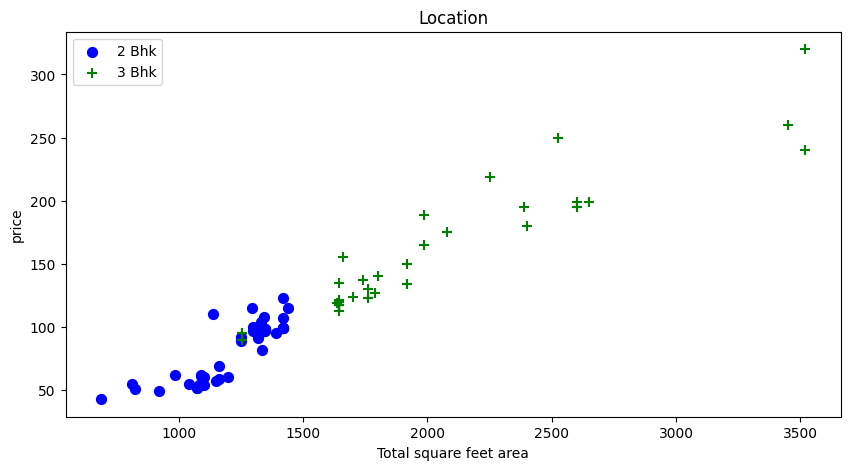

In [157]:
plot_scatter_chart(df7,"Hebbal")

Text(0, 0.5, 'count')

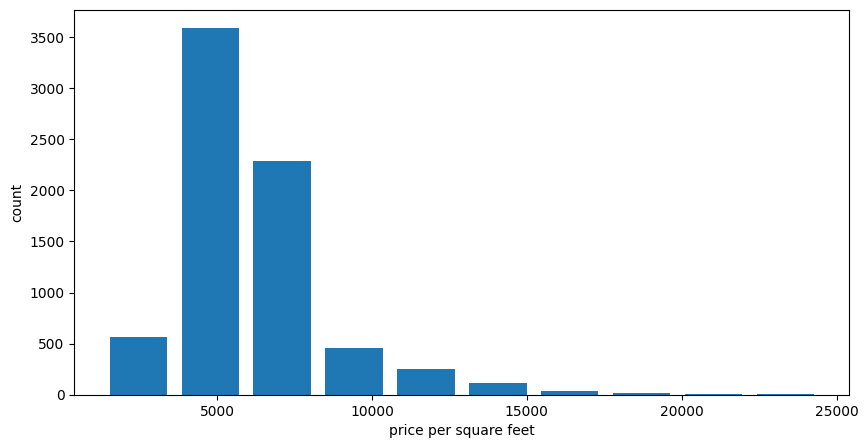

In [158]:
plt.hist(df7.price_per_sqft, rwidth=0.8)
plt.xlabel('price per square feet')
plt.ylabel('count')

In [159]:
df7.bath.unique()

array([ 3.,  2.,  1.,  4.,  5.,  8.,  6.,  7.,  9., 12., 16., 13.])

In [160]:
df7[df7.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5292,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8497,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8583,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9296,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9618,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'count')

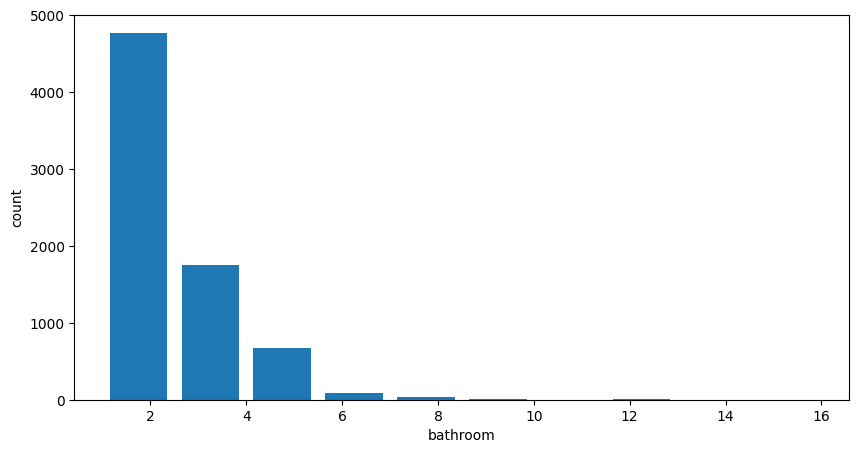

In [161]:
plt.hist(df7.bath, rwidth=0.8)
plt.xlabel('bathroom')
plt.ylabel('count')

In [162]:
df7[df7.bath > df7.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1647,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5253,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6733,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8427,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [163]:
df8 = df7[df7.bath < df7.bhk+2]
df8.shape

(7246, 7)

In [164]:
df9 = df8.drop(['size', 'price_per_sqft'], axis = 1)
df9.head()

,location,total_sqft,bath,price,bhk
0,Devarabeesana Halli,1672.0,3.0,150.0,3
1,Devarabeesana Halli,1750.0,3.0,149.0,3
2,Devarabeesana Halli,1750.0,3.0,150.0,3
4,Devarachikkanahalli,1250.0,2.0,40.0,2
5,Devarachikkanahalli,1200.0,2.0,83.0,2


In [165]:
df9.groupby("location")['location'].count()
# location_stats = df9.groupby('location')['location']
# df11 =
pd.set_option('display.max_rows', 300)
location_counts = df9['location'].value_counts()
# Step 2: Find the locations that have counts less than 10
locations_to_replace = location_counts[location_counts <= 10].index

# Step 3: Replace those locations with "Other"
df9['location'] = df9['location'].replace(locations_to_replace, 'Other')


In [166]:
df10 = pd.get_dummies(data = df9, columns=['location'],dtype=int)

In [167]:
df10.head()

,total_sqft,bath,price,bhk,location_ Devarachikkanahalli,location_1st Phase JP Nagar,location_5th Phase JP Nagar,location_6th Phase JP Nagar,location_7th Phase JP Nagar,location_8th Phase JP Nagar,...,location_Varthur,location_Vidyaranyapura,location_Vijayanagar,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yeshwanthpur,location_other
0,1672.0,3.0,150.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1750.0,3.0,149.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1750.0,3.0,150.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1250.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1200.0,2.0,83.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [168]:
df10.shape

(7246, 174)

In [169]:
df10.head()

,total_sqft,bath,price,bhk,location_ Devarachikkanahalli,location_1st Phase JP Nagar,location_5th Phase JP Nagar,location_6th Phase JP Nagar,location_7th Phase JP Nagar,location_8th Phase JP Nagar,...,location_Varthur,location_Vidyaranyapura,location_Vijayanagar,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yeshwanthpur,location_other
0,1672.0,3.0,150.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1750.0,3.0,149.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1750.0,3.0,150.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1250.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1200.0,2.0,83.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [170]:
df10[df10['total_sqft'] >10000].shape

(4, 174)

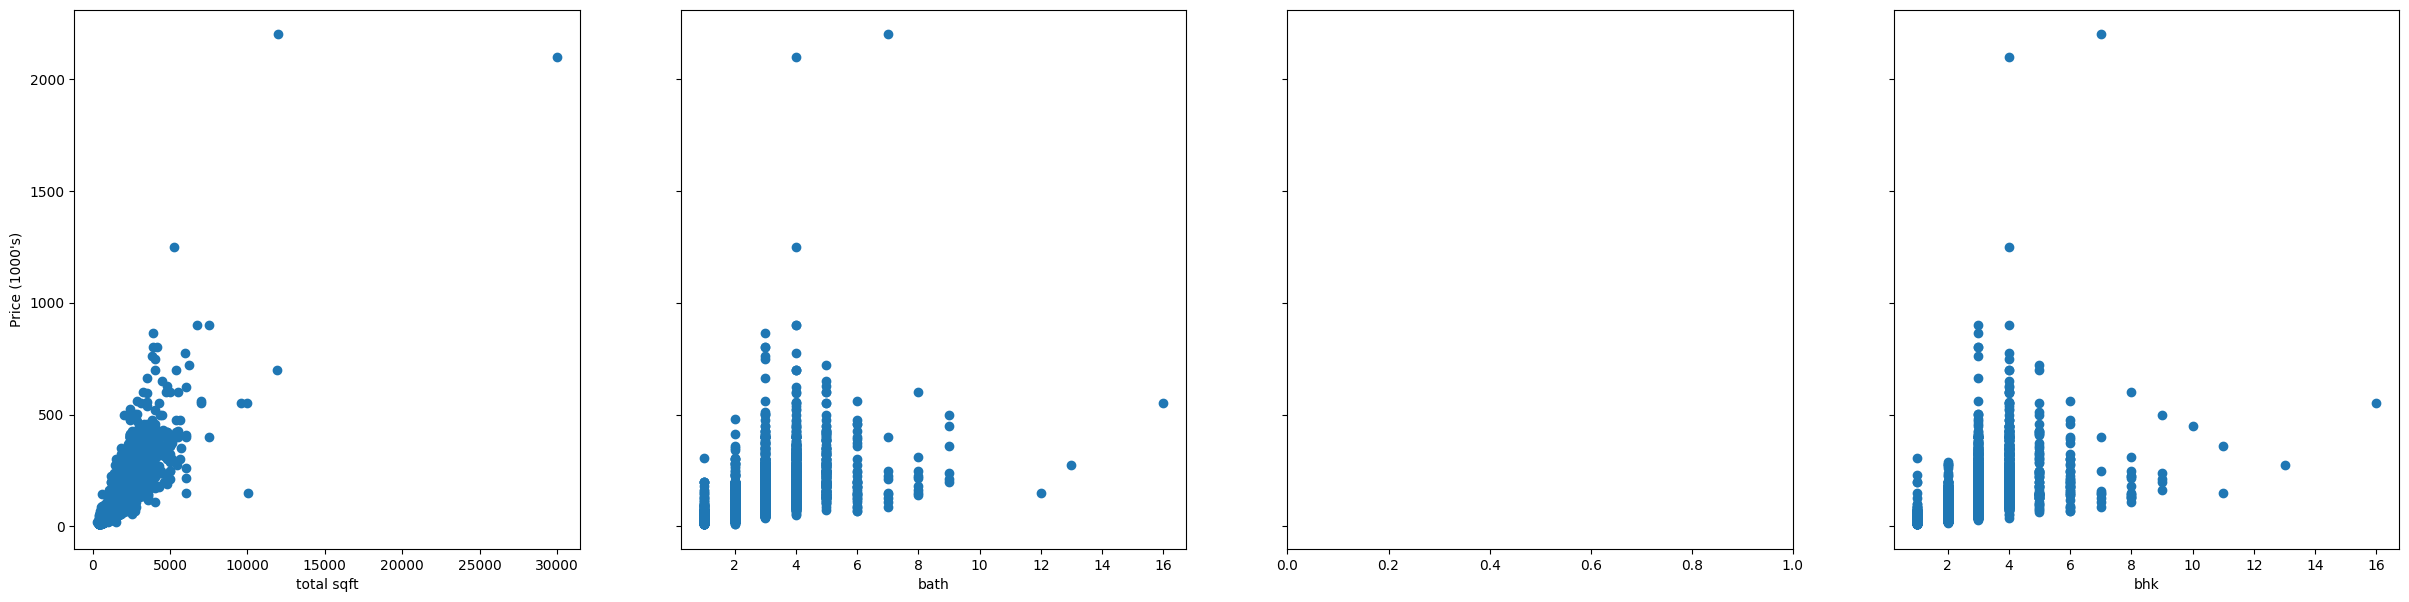

In [171]:
x_features = ["total sqft", "bath", "bhk", "bhk"]
fig,ax=plt.subplots(1, 4, figsize=(30, 7), sharey=True)
X = df10.to_numpy()
y = X[:,2]
for i in range(len(ax)):
  if i == 2:
    continue
  ax[i].scatter(X[:,i],y)
  ax[i].set_xlabel(x_features[i])
ax[0].set_ylabel("Price (1000's)")
plt.show()

In [172]:
# # @title Default title text
# columns = list(df10.columns)

# # Step 2: Pop out the third column and append it to the end
# third_column = columns.pop(2)  # Index 2 refers to the third column (0-based index)
# columns.append(third_column)

# # Step 3: Reorder the DataFrame
# df10 = df10[columns]


In [173]:
df10.head()

,total_sqft,bath,bhk,location_ Devarachikkanahalli,location_1st Phase JP Nagar,location_5th Phase JP Nagar,location_6th Phase JP Nagar,location_7th Phase JP Nagar,location_8th Phase JP Nagar,location_9th Phase JP Nagar,...,location_Vidyaranyapura,location_Vijayanagar,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yeshwanthpur,location_other,price
0,1672.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,150.0
1,1750.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,149.0
2,1750.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,150.0
4,1250.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,40.0
5,1200.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,83.0


# **Model training and evaluation**

In [174]:
# df10.to_csv('cleaned_data.csv', index=False)

In [175]:
data = pd.read_csv("cleaned_data.csv")

In [ ]:
# sacling features
# x_train_scaled = x_train.copy()
# x_train_scaled['total_sqft'] = x_train_scaled['total_sqft'] / x_train.total_sqft.max()
# x_train_scaled['bath'] = x_train_scaled['bath'] / x_train.bath.max()
# x_train_scaled['bhk'] = x_train_scaled['bath'] / x_train.bhk.max()
# x_train_scaled.head()

# x_cv_scaled = x_cv.copy()
# x_cv_scaled['total_sqft'] = x_cv_scaled['total_sqft'] / x_cv.total_sqft.max()
# x_cv_scaled['bath'] = x_cv_scaled['bath'] / x_cv.bath.max()
# x_cv_scaled['bhk'] = x_cv_scaled['bath'] / x_cv.bhk.max()

from sklearn.preprocessing import StandardScaler

scaler_linear = StandardScaler()

x_train_scaled = scaler_linear.fit_transform(x_train)
x_cv_scaled = scaler_linear.fit_transform(x_cv)

# After scaling turns out same score
model = LinearRegression()
model.fit(x_train_scaled, y_train )

yhat_train = model.predict(x_train_scaled)
mse_train = mean_squared_error(y_train,yhat_train)
print(mse_train)       #1136.9837440183458

yhat_cv = model.predict(x_cv_scaled)
mse_cv = mean_squared_error(y_cv,yhat_cv)
print(mse_cv)          #1474.8854799602243

print(model.score(x_train_scaled, y_train))      #0.8630016227698093
print(model.score(x_cv_scaled,y_cv) )         #-5.021704754695944e+26

1133.3537358869874
3.539327721107703e+26
0.863439012684964
-4.99469903556743e+22


In [176]:
data.head()

,total_sqft,bath,bhk,location_ Devarachikkanahalli,location_1st Phase JP Nagar,location_5th Phase JP Nagar,location_6th Phase JP Nagar,location_7th Phase JP Nagar,location_8th Phase JP Nagar,location_9th Phase JP Nagar,...,location_Vidyaranyapura,location_Vijayanagar,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yeshwanthpur,location_other,price
0,1672.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,150.0
1,1750.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,149.0
2,1750.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,150.0
3,1250.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,40.0
4,1200.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,83.0


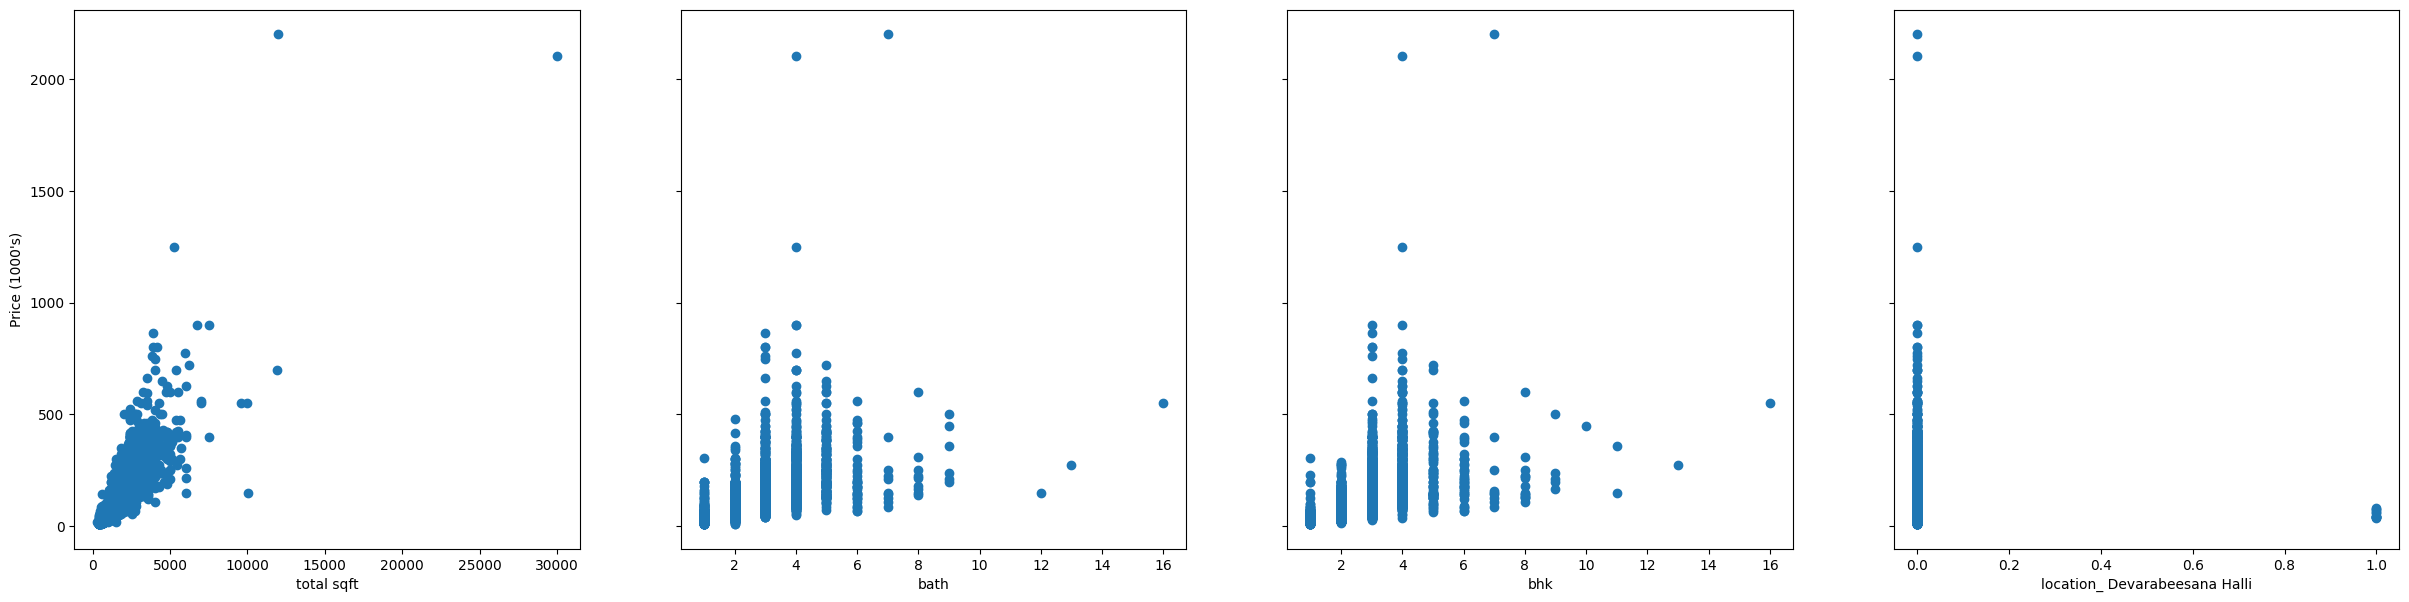

In [177]:
x_features = ["total sqft", "bath", "bhk", "location_ Devarabeesana Halli"]
fig,ax=plt.subplots(1, 4, figsize=(30, 7), sharey=True)
X = data.to_numpy()
y = X[:,-1]
for i in range(len(ax)):
    ax[i].scatter(X[:,i],y)
    ax[i].set_xlabel(x_features[i])
ax[0].set_ylabel("Price (1000's)")
plt.show()

In [65]:
data[data['total_sqft'] >10000].shape

(4, 264)

In [66]:
data[data['bath'] >10].shape

(3, 264)

In [67]:
data[data['bhk'] >12].shape

(2, 264)

In [68]:
data[data['price'] >1200].shape

(3, 264)

In [178]:
drop_outliers = data[(data['total_sqft'] >10000) |
                     (data['bath'] >10) |
                     (data['bhk'] >10) |
                     (data['price'] >1200)].index

new_data = data.drop(drop_outliers)
print(data.shape)
print(new_data.shape,type(new_data))

(7246, 174)
(7237, 174) <class 'pandas.core.frame.DataFrame'>


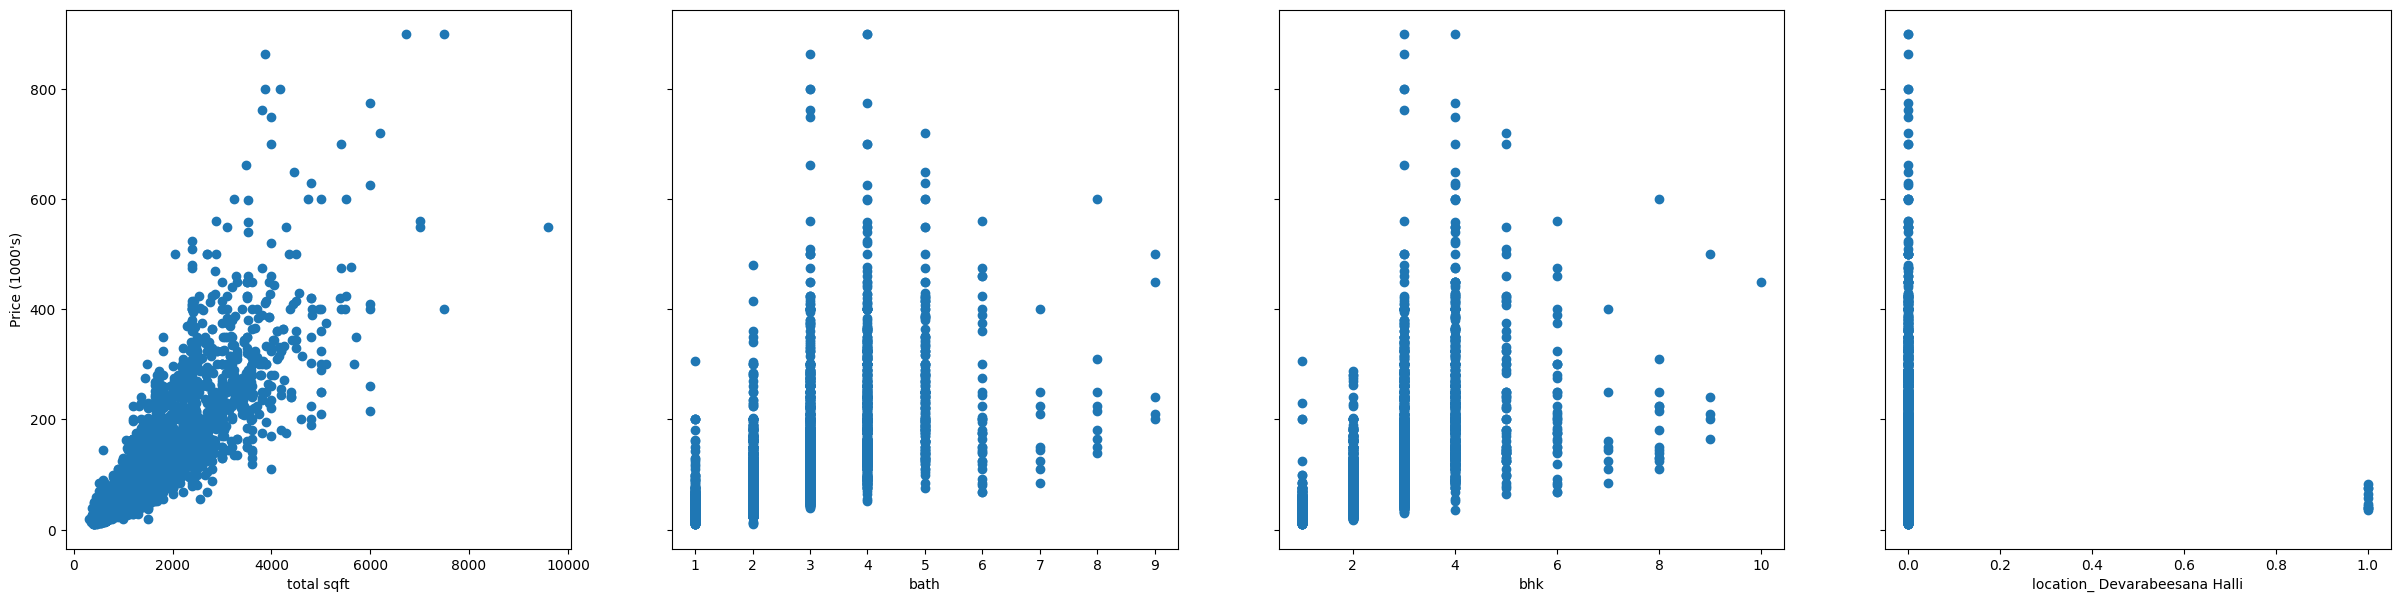

In [179]:
x_features = ["total sqft", "bath", "bhk", "location_ Devarabeesana Halli"]
fig,ax=plt.subplots(1, 4, figsize=(30, 7), sharey=True)
X = new_data.to_numpy()
y = X[:,-1]
for i in range(len(ax)):
    ax[i].scatter(X[:,i],y)
    ax[i].set_xlabel(x_features[i])
ax[0].set_ylabel("Price (1000's)")
plt.show()

# **Normalising data**

In [180]:
from sklearn.preprocessing import StandardScaler

scaler_linear = StandardScaler()

transform_col = ["total_sqft", "bath", "bhk"]

new_data_norm = new_data.copy()

new_data_norm[transform_col] = scaler_linear.fit_transform(new_data[transform_col])


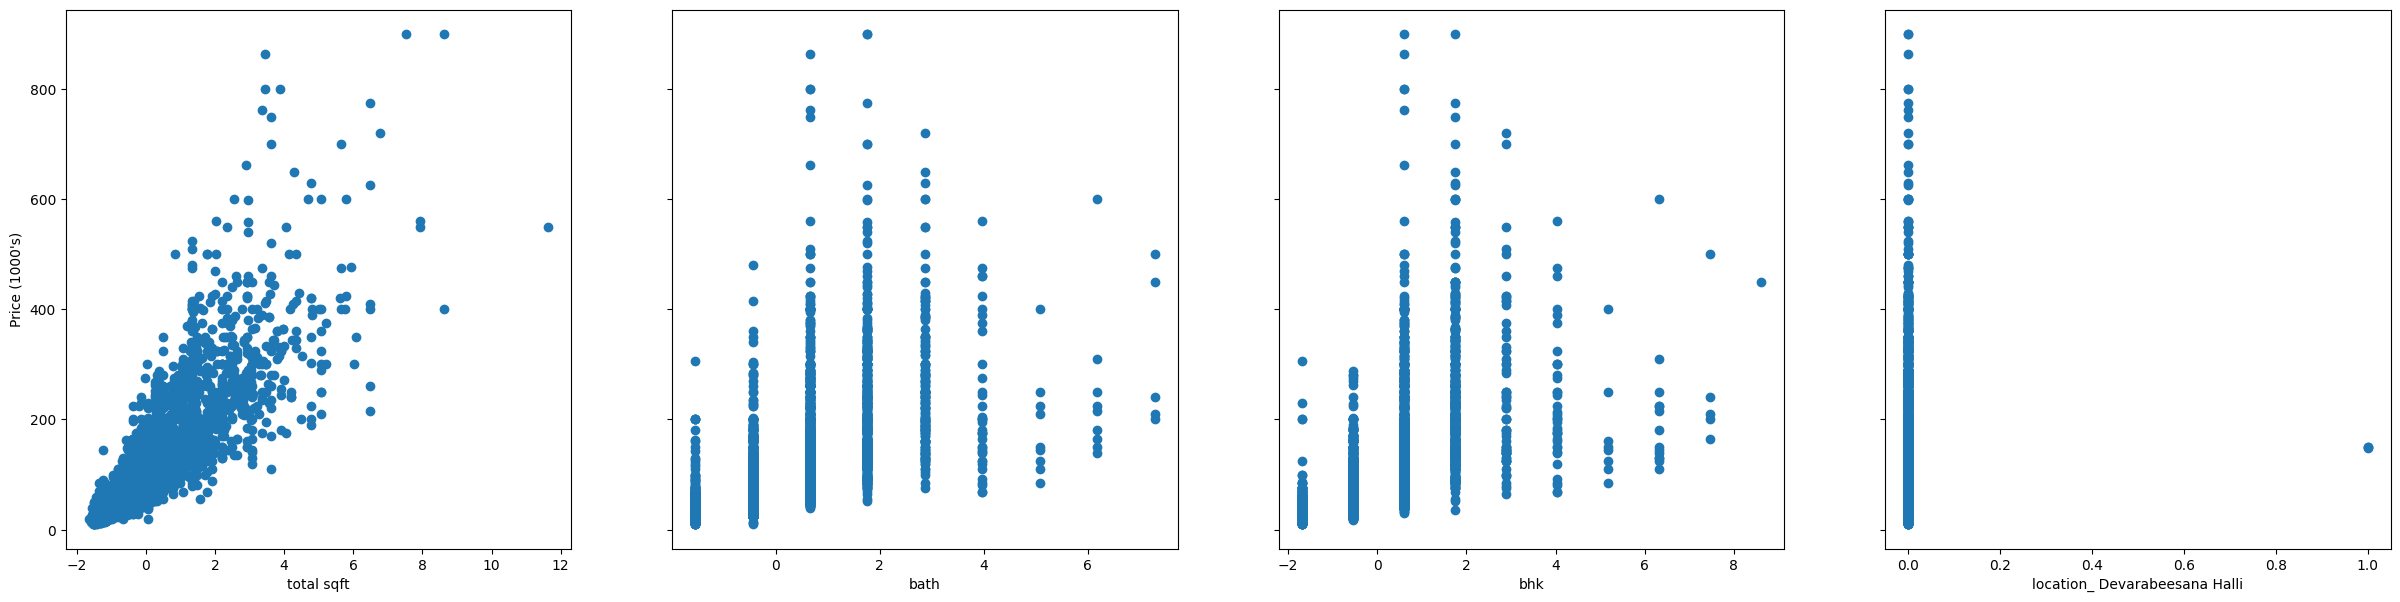

In [74]:
# x_features = ["total sqft", "bath", "bhk", "location_ Devarabeesana Halli"]
# fig,ax=plt.subplots(1, 4, figsize=(30, 7), sharey=True)
# X = new_data_norm.to_numpy()
# y = X[:,-1]
# for i in range(len(ax)):
#     ax[i].scatter(X[:,i],y)
#     ax[i].set_xlabel(x_features[i])
# ax[0].set_ylabel("Price (1000's)")
# plt.show()

In [195]:
X = new_data_norm.drop('price', axis =1)
X.head()

,total_sqft,bath,bhk,location_ Devarachikkanahalli,location_1st Phase JP Nagar,location_5th Phase JP Nagar,location_6th Phase JP Nagar,location_7th Phase JP Nagar,location_8th Phase JP Nagar,location_9th Phase JP Nagar,...,location_Varthur,location_Vidyaranyapura,location_Vijayanagar,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yeshwanthpur,location_other
0,0.305591,0.656284,0.597487,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.417061,0.656284,0.597487,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.417061,0.656284,0.597487,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.297490,-0.449028,-0.547340,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.368945,-0.449028,-0.547340,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [182]:
y = new_data.price
y.head()

,price
0,150.0
1,149.0
2,150.0
3,40.0
4,83.0


In [196]:
from sklearn.model_selection import train_test_split

x_train , x_, y_train, y_ = train_test_split(X,y, test_size=0.4, random_state =88)

In [197]:
x_cv, x_test, y_cv, y_test = train_test_split(x_,y_, test_size=0.5,  random_state =88)

In [198]:
print(f"shape of X_train: {x_train.shape}")
print(f"shape of y_train: {y_train.shape}")
print(f"shape of X_train: {x_cv.shape}")
print(f"shape of y_train: {y_cv.shape}")
print(f"shape of X_test: {x_test.shape}")
print(f"shape of y_test: {y_test.shape}")

shape of X_train: (4342, 173)
shape of y_train: (4342,)
shape of X_train: (1447, 173)
shape of y_train: (1447,)
shape of X_test: (1448, 173)
shape of y_test: (1448,)


In [199]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linear_model = LinearRegression()



In [200]:
# Before scaling score

linear_model.fit(x_train,y_train)
yhat_train = linear_model.predict(x_train)
mse_train = mean_squared_error(y_train,yhat_train)
print(mse_train)      # 1133.3532317877614
print(linear_model.score(x_train, y_train))



# print(linear_model.score(x_train, y_train))      #0.8634390734253011
# linear_model.score(x_cv,y_cv)           #0.7918641712549803

# ''' 775.8064963228705
# 1.9781288914938952e+18
# 0.8825323360586553
# -343682226347498.3 '''

1221.9738802294144
0.8148580056875425


In [201]:
yhat_cv = linear_model.predict(x_cv)
mse_cv = mean_squared_error(y_cv,yhat_cv)
print(mse_cv)      #1474.8854799602243
print(linear_model.score(x_cv, y_cv))

1275.706188577066
0.7995609988282748


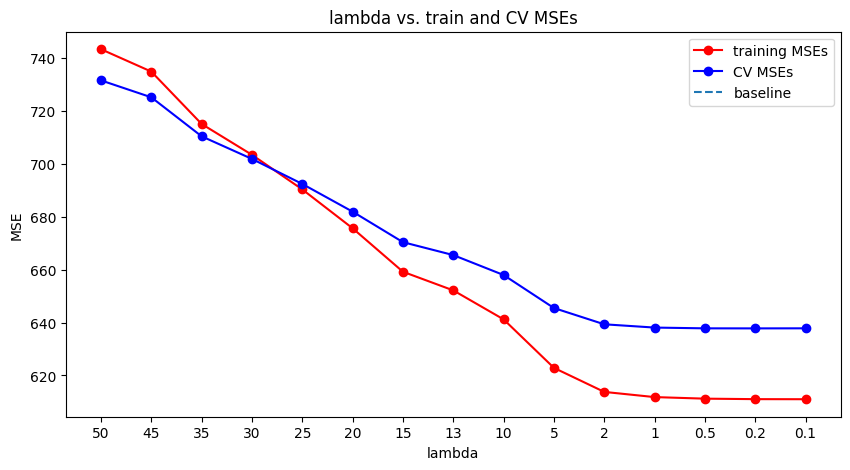

In [202]:
from sklearn.linear_model import Ridge

# Define lambdas to plot
reg_params = [50,45,35,30,25,20,15,13,10, 5, 2, 1, 0.5, 0.2, 0.1]

def train_plot_reg_params(reg_params, x_train, y_train, x_cv, y_cv, baseline=None):

    train_mses = []
    cv_mses = []
    models = []
    for reg_param in reg_params:

        # Create and train the model
        model = Ridge(alpha=reg_param)
        model.fit(x_train, y_train)
        models.append(model)

        yhat = model.predict(x_train)
        train_mse = mean_squared_error(y_train, yhat) / 2
        train_mses.append(train_mse)

        # Compute the cross-validation MSE
        yhat = model.predict(x_cv)
        cv_mse = mean_squared_error(y_cv, yhat) / 2
        cv_mses.append(cv_mse)


    # Plot the results
    reg_params = [str(x) for x in reg_params]
    plt.plot(reg_params, train_mses, marker='o', c='r', label='training MSEs');
    plt.plot(reg_params, cv_mses, marker='o', c='b', label='CV MSEs');
    plt.plot(reg_params, np.repeat(baseline, len(reg_params)), linestyle='--', label='baseline')
    plt.title("lambda vs. train and CV MSEs")
    plt.xlabel("lambda");
    plt.ylabel("MSE");
    plt.legend()
    plt.show()

train_plot_reg_params(reg_params, x_train, y_train, x_cv, y_cv, baseline=None)
best_alpha = 25

In [204]:
model = Ridge(alpha=15)
model.fit(x_train, y_train)

yhat_train = model.predict(x_train)
yhat_cv = model.predict(x_cv)
yhat_test = model.predict(x_test)

train_mse = mean_squared_error(y_train, yhat_train)
cv_mse = mean_squared_error(y_cv, yhat_cv)
test_mse = mean_squared_error(y_test, yhat_test)

print(f"train mse: {train_mse}")
print(f"cv mse: {cv_mse}")
print(f"test mse: {test_mse}")

print(f"train score: {model.score(x_train,yhat_train)}")
print(f"cv score: {model.score(x_cv,yhat_cv)}")
print(f"testscore: {model.score(x_test,yhat_test)}")

# train mse: 1380.8599451287494
# cv mse: 1382.0458543562684
# test mse: 1146.1303225765341
# train score: 1.0
# cv score: 1.0
# testscore: 1.0

train mse: 1318.394836416429
cv mse: 1340.774330926078
test mse: 1112.4677362342459
train score: 1.0
cv score: 1.0
testscore: 1.0
